In [393]:
# import pandas library used for importing data and data manipulation and numpy library for computation.
import pandas as pd
import numpy as np
#read the data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for Text Classification task-20220302/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for Text Classification task-20220302/train.csv')
val_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for Text Classification task-20220302/val.csv')

In [394]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [395]:
# Make the datasets dataframes and add labels to the columns
train_data = pd.DataFrame(train_data)
train_data.columns=['sentence','label']

test_data =  pd.DataFrame(test_data)
test_data.columns=['sentence','label']

val_data = pd.DataFrame(val_data)
val_data.columns=['sentence','label']

print(train_data.info())
print(test_data.info())
print(val_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1399 non-null   object
 1   label     1399 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1399 non-null   object
 1   label     1399 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  199 non-null    object
 1   label     199 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None


In [396]:
# Set the data into feature and target variables then transform them to arrays to ease working.
X_train = train_data['sentence'].values
y_train = train_data['label'].values
X_test = test_data['sentence'].values
y_test = test_data['label'].values
X_val = val_data['sentence'].values
y_val = val_data['label'].values

In [397]:
#vectorize the  sentences using scikit-learn library
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_val = vectorizer.transform(X_val)
X_train

<1399x34431 sparse matrix of type '<class 'numpy.int64'>'
	with 468775 stored elements in Compressed Sparse Row format>

In [398]:
#add layers in order to build a sequential model
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [399]:
# compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 16)                550912    
                                                                 
 dense_67 (Dense)            (None, 1)                 17        
                                                                 
Total params: 550,929
Trainable params: 550,929
Non-trainable params: 0
_________________________________________________________________


In [400]:
# train the model
history = model.fit(X_train, y_train,
                   epochs=3,
                   verbose=False,
                   validation_data=(X_val,y_val),
                   batch_size=16)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_34/dense_66/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_34/dense_66/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_34/dense_66/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


In [401]:
#Get the accuracy of the model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  1.0000
Testing Accuracy:  0.8442


In [402]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')



In [403]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

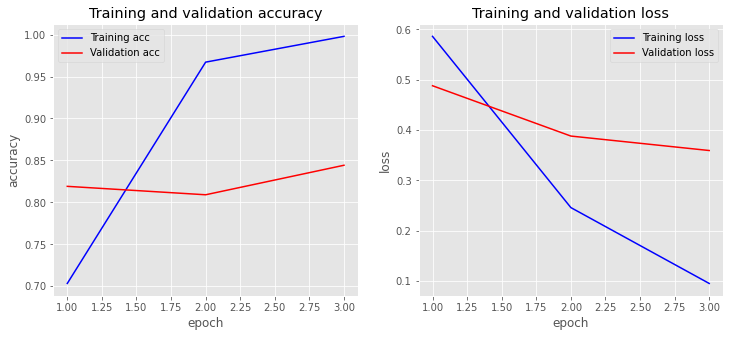

In [404]:
plot_history(history)